In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Fthinoporino'
raceDate = '1/10/2023'
surface = 'Gravel'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/85393-mykteo-fthinoporino-rally-2023/?s='
startat, no_ss=439407, int(5)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Papadimitriou,C1,6:50.25,-,88.1,1,Fthinoporino,1/10/2023,Gravel,Championship,1
1,2,#1,Kechagias Gior,C1,6:59.42,+9.17 + 9.17,86.2 0.91,1,Fthinoporino,1/10/2023,Gravel,Championship,2
2,3,#3,Kirkos Panagio,C2,7:18.35,+28.10 + 18.93,82.5 2.80,1,Fthinoporino,1/10/2023,Gravel,Championship,3
3,4,#4,Halkias Efthim,C3,7:19.28,+29.03 + 0.93,82.3 2.89,1,Fthinoporino,1/10/2023,Gravel,Championship,4
4,5,#5,Ismailos Panos,C2,7:31.80,+41.55 + 12.52,80.0 4.14,1,Fthinoporino,1/10/2023,Gravel,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,17,#24,Batis Vassilis,C6 F2,13:57.19,+4:08.52 + 29.06,61.4 17.4,5,Fthinoporino,1/10/2023,Gravel,Championship,17
17,18,#28,Andrikopoulos,C5 F2,14:27.00,+4:38.33 + 29.81,59.3 19.5,5,Fthinoporino,1/10/2023,Gravel,Championship,18
18,19,#27,Karatarouk K.,C4 F2,14:35.14,+4:46.47 + 8.14,58.7 20.1,5,Fthinoporino,1/10/2023,Gravel,Championship,19
19,20,#14,Yfantis V. -,C3 F2,14:38.54,+4:49.87 + 3.40,58.5 20.3,5,Fthinoporino,1/10/2023,Gravel,Championship,20


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Papadimitriou,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,1,410.25
1,Kechagias Gior,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,2,419.42
2,Kirkos Panagio,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,3,438.35
3,Halkias Efthim,C3,1,Fthinoporino,1/10/2023,Gravel,Championship,4,439.28
4,Ismailos Panos,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,5,451.80
...,...,...,...,...,...,...,...,...,...
16,Batis Vassilis,C6 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,17,837.19
17,Andrikopoulos,C5 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,18,867.00
18,Karatarouk K.,C4 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,19,875.14
19,Yfantis V. -,C3 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,20,878.54


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race         ss          
Fthinoporino 1     410.25
             2     895.27
             3     401.81
             4     879.22
             5     588.67

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Papadimitriou,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,1,410.25,410.25,0.00,0.000000,01
1,Kechagias Gior,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,2,419.42,410.25,9.17,2.235222,01
2,Kirkos Panagio,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,3,438.35,410.25,28.10,6.849482,01
3,Halkias Efthim,C3,1,Fthinoporino,1/10/2023,Gravel,Championship,4,439.28,410.25,29.03,7.076173,01
4,Ismailos Panos,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,5,451.80,410.25,41.55,10.127971,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Batis Vassilis,C6 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,17,837.19,588.67,248.52,42.217201,05
117,Andrikopoulos,C5 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,18,867.00,588.67,278.33,47.281159,05
118,Karatarouk K.,C4 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,19,875.14,588.67,286.47,48.663937,05
119,Yfantis V. -,C3 F2,5,Fthinoporino,1/10/2023,Gravel,Championship,20,878.54,588.67,289.87,49.241511,05


In [22]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Papadimitriou,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,1,410.25,410.25,0.00,0.000000,01
1,Kechagias Gior,C1,1,Fthinoporino,1/10/2023,Gravel,Championship,2,419.42,410.25,9.17,2.235222,01
2,Kirkos Panagio,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,3,438.35,410.25,28.10,6.849482,01
4,Ismailos Panos,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,5,451.80,410.25,41.55,10.127971,01
9,Theocharopoulo,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,10,469.15,410.25,58.90,14.357099,01
10,Davaris Nikos,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,11,483.44,410.25,73.19,17.840341,01
13,Ladias Akis -,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,14,503.84,410.25,93.59,22.812919,01
20,Yiangou Y. -,C2,1,Fthinoporino,1/10/2023,Gravel,Championship,21,550.85,410.25,140.60,34.271785,01
27,Papadimitriou,C1,2,Fthinoporino,1/10/2023,Gravel,Championship,1,895.27,895.27,0.00,0.000000,02
28,Kechagias Gior,C1,2,Fthinoporino,1/10/2023,Gravel,Championship,2,902.11,895.27,6.84,0.764015,02


In [23]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Fthinoporino                                
SS.                      01      02      03      04      05
Crew                                                       
Davaris Nikos         73.19  166.54   81.79  194.89  106.49
Ismailos Panos        41.55  401.30   35.26   85.67   41.18
Kechagias Gior         9.17    6.84   14.49   24.02   12.04
Kirkos Panagio        28.10   43.29   21.92   49.53   66.69
Ladias Akis  -        93.59  190.32   92.94  213.36  134.21
Papadimitriou          0.00    0.00    0.00    0.00    0.00
Theocharopoulo        58.90  126.60   62.53  160.85  104.93
Yiangou Y.  -        140.60  262.61  140.68  262.68  179.78

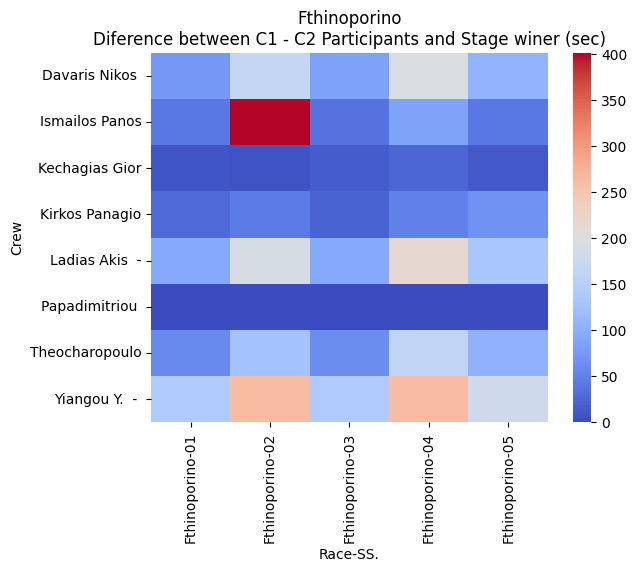

In [24]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C1 - C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

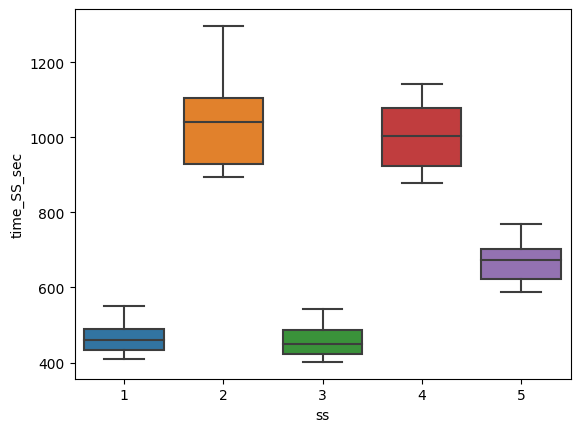

In [25]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

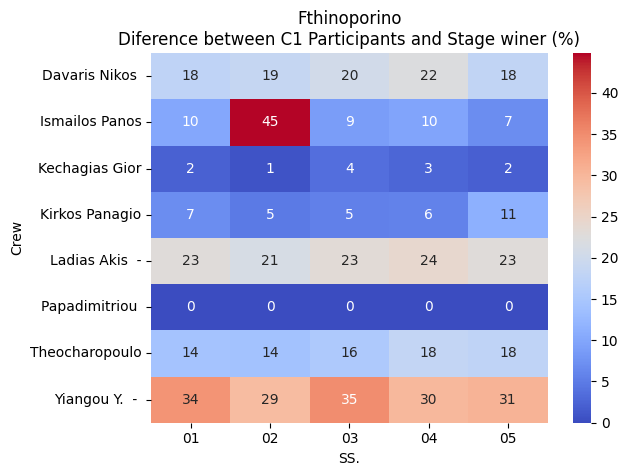

In [26]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")